<a href="https://colab.research.google.com/github/nasirabbas006/Titanic_Machine_Learning_Project/blob/main/Titanic_Machine_learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import os

###Import Dataset from Kaggle with Pandas

In [161]:
# Download the latest version of the Titanic dataset
path = kagglehub.dataset_download("shuofxz/titanic-machine-learning-from-disaster")

print("Path to dataset files:", path)

# List all files in the dataset directory to find the correct CSV file
files = os.listdir(path)
print("Files in the dataset directory:", files)

# Find and load the correct CSV file
for file in files:
    if file.endswith('.csv'):  # Check for CSV files
        file_path = os.path.join(path, file)
        titanic = pd.read_csv(file_path)
        print(f"Loaded dataset from file: {file}")
        break

# Display the first few rows of the DataFrame
print(titanic.head())

Path to dataset files: /root/.cache/kagglehub/datasets/shuofxz/titanic-machine-learning-from-disaster/versions/1
Files in the dataset directory: ['train.csv', 'test.csv']
Loaded dataset from file: train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      

In [162]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###Our target variable is Survived

Let's inspect the data a bit closer using .shape, .describe and .info methods.


In [163]:
print("shape",{titanic.shape}, "\n")
print("describe: \n", titanic.describe(), "\n")
print("info: \n", titanic.info(), "\n")

shape {(891, 12)} 

describe: 
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   

<class 'pandas.core.frame.DataFrame'>
RangeInde

So we have 12 variables -1 for our target so that's 11 variables column 5, 10 and 11 have some missing data as well

Both column 10 and 11 are not numerical so we can ignore them. As for column 5 we're going to use mean imputing to impute the missing data later. First let's get rid of all the columns we're not going to use

In [164]:
titanic = titanic.drop("Name", axis = 1)
titanic = titanic.drop("Cabin", axis = 1)
titanic = titanic.drop("Embarked", axis = 1)
titanic = titanic.drop("Ticket", axis = 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


We are not getting rid of the Sex column because that variable has only 2 classes so they can be easily transformed into 1s and 0s

In [165]:
titanic = titanic.replace(to_replace=["male", "female"], value=[1, 0])
titanic.head()

<ipython-input-165-14a41b99e61e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic = titanic.replace(to_replace=["male", "female"], value=[1, 0])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


Let's check for any outliers!

In [166]:
titanic[["Fare", "Age"]].describe(percentiles=[.25, .50, .75, .90, .99])

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
90%,77.958300,50.000000
99%,249.006220,65.870000
max,512.329200,80.000000


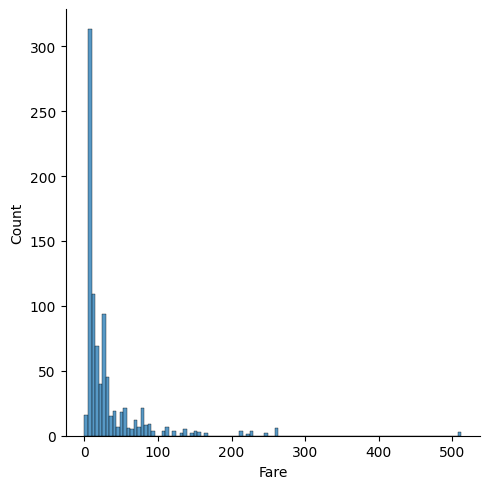

In [167]:
sns.displot(titanic["Fare"])

In [168]:
titanic = titanic.drop(titanic[titanic["Fare"] > 500].index)

In [169]:
max(titanic["Fare"])

263.0

<ipython-input-170-3c5245ad8e94>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

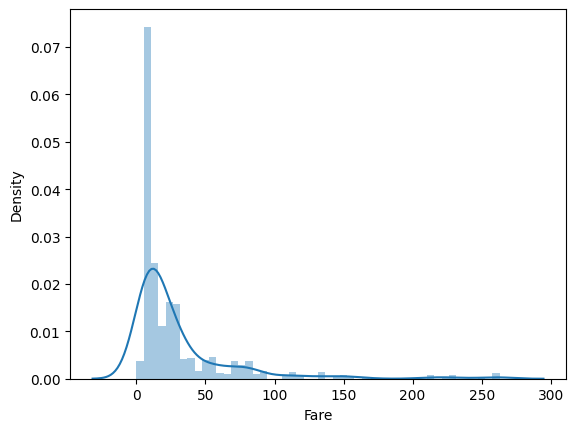

In [170]:
sns.distplot(titanic["Fare"])

<ipython-input-171-8d24cf1d34b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"])


<Axes: xlabel='Age', ylabel='Density'>

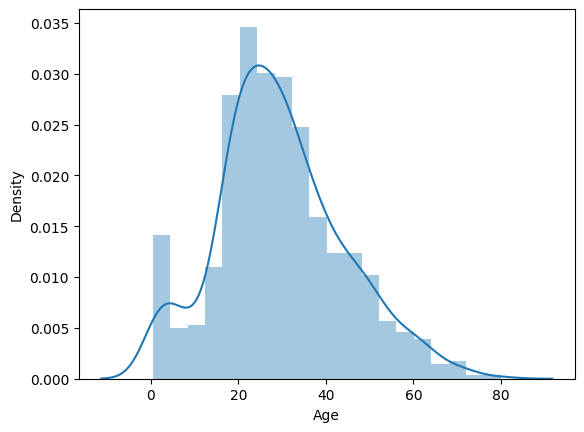

In [171]:
sns.distplot(titanic["Age"])

Let's check for null values now


In [172]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0


177 values is quite a bit so let's attempt to fill them in. First we need to replace all the NaN values by np.nan as that works better with sklearn

In [173]:
titanic = titanic.fillna(np.nan)

In [174]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan,strategy= 'mean')

titanic = pd.DataFrame(imp.fit_transform(titanic), columns = titanic.columns)

In [175]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0


In [176]:
titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,0.381757,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164
std,257.405474,0.486091,0.834007,0.478011,13.019816,1.104186,0.806949,41.176366
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,1.000000,29.675345,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


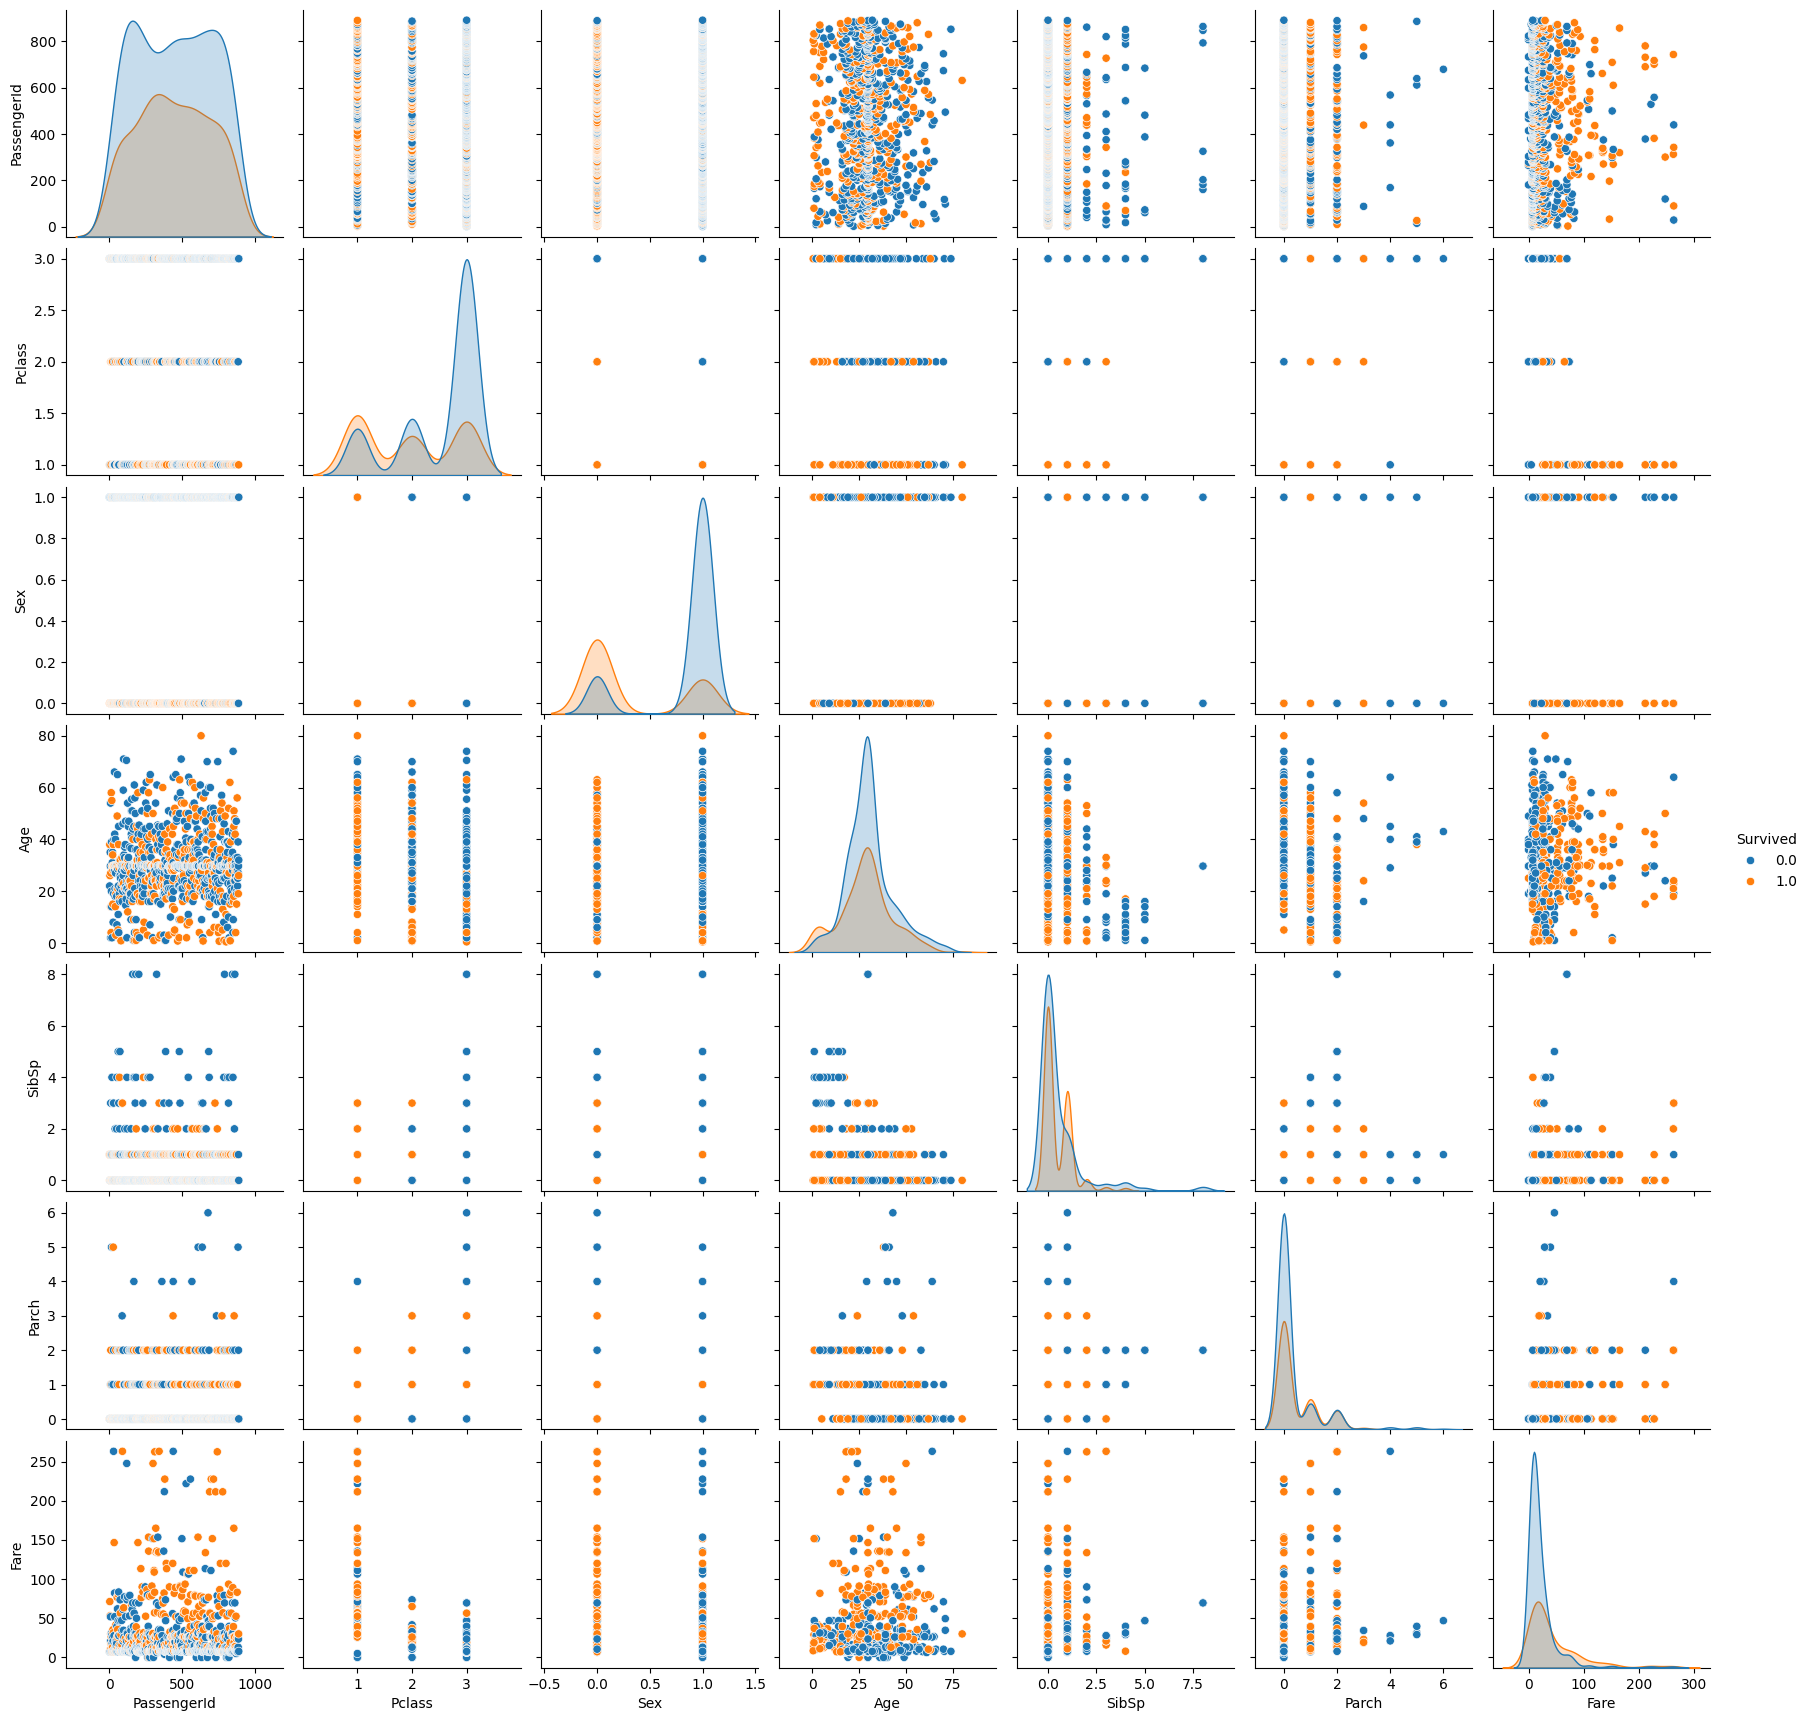

In [177]:
sns.pairplot(titanic,hue="Survived")

No NaN values left!

By using the sklearn library, we’ll import the test_train_split to split the data. But before splitting the data, we’ll divide the dataset into two dataframes X and y

In [178]:
from sklearn.model_selection import train_test_split

X = titanic.drop(["Survived", "PassengerId"], axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3.0,1.0,22.0,1.0,0.0,7.2500
1,1.0,0.0,38.0,1.0,0.0,71.2833
2,3.0,0.0,26.0,0.0,0.0,7.9250
3,1.0,0.0,35.0,1.0,0.0,53.1000
4,3.0,1.0,35.0,0.0,0.0,8.0500


In [179]:
Y = titanic["Survived"]
Y.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


Now we can split the data into a train and test set

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.7, test_size=0.3, random_state=100)

Since we have 2 continous variables we can use a scaler so that the data is more comparable

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[["Age", "Fare"]] = scaler.fit_transform(X_train[["Age", "Fare"]])
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
85,3.0,0.0,0.250443,3.0,0.0,-0.369360
791,3.0,1.0,-0.359845,0.0,0.0,-0.557544
161,2.0,0.0,0.784445,0.0,0.0,-0.371726
758,3.0,1.0,0.860731,0.0,0.0,-0.575780
408,3.0,0.0,-0.003182,3.0,1.0,-0.141844


Let's look at the survival rate now

In [182]:
survive = (sum(titanic['Survived'])/len(titanic['Survived'].index))*100
survive

38.17567567567568

That's only a 38% survive rate, that isn't great

Let’s look at the correlation between the variables. Suppose the correlation is high between the variables. In that case, we can remove the columns because if two variables are highly correlated, then there is no need to build the model using both the variables. We can explain the target variable using one of these two variables

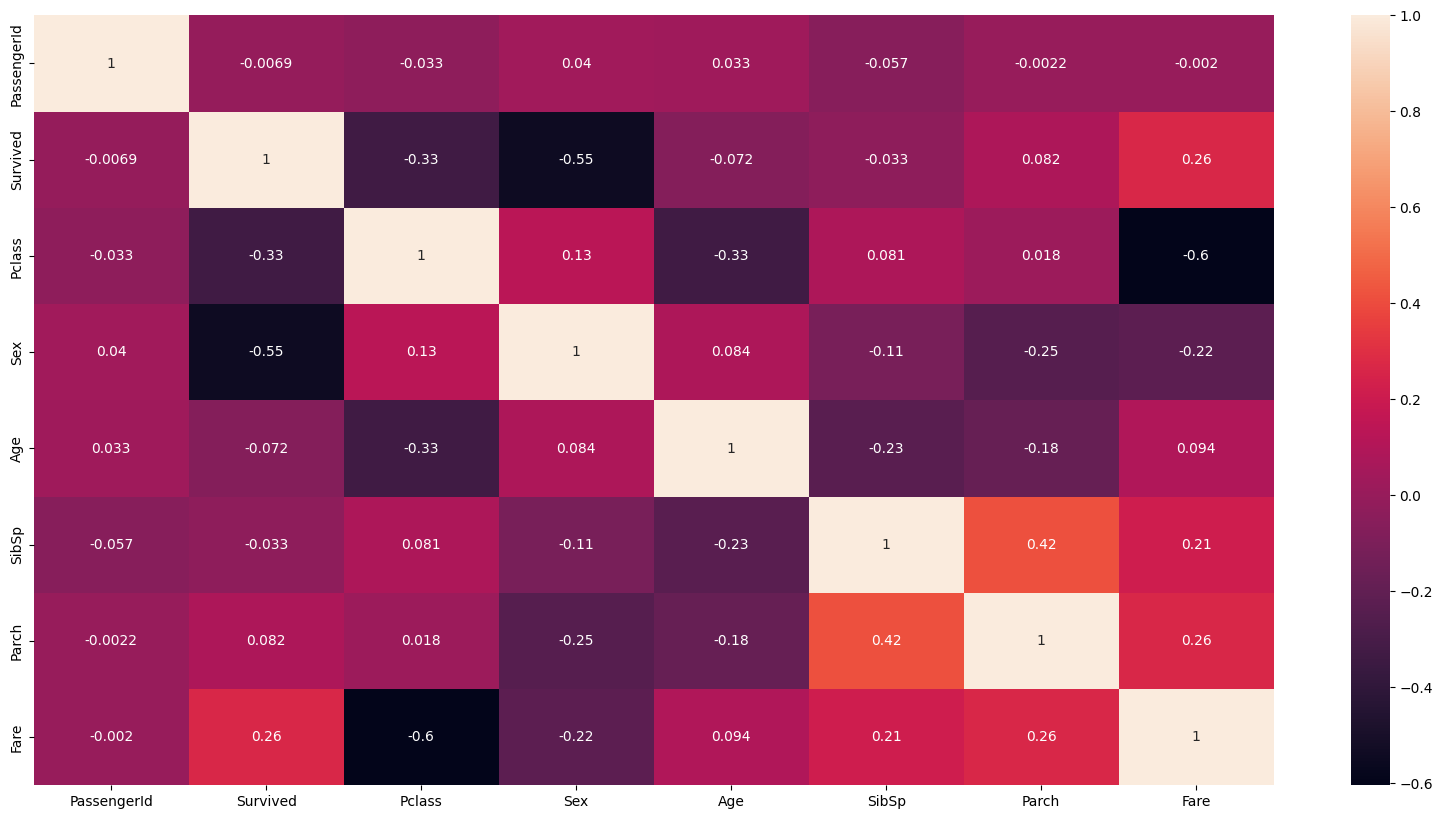

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
sns.heatmap(titanic.corr(), annot=True)
plt.show()

We’ll use the statsmodel library to build our first model. Let’s see how our model looks like if we consider all the variables.

In [184]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

#Logistic Regression model
logm1 = sm.GLM(Y_train,(X_train_sm), family= sm.families.Binomial() )

res = logm1.fit()
res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  621
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -273.59
Date:                Sun, 15 Dec 2024   Deviance:                       547.17
Time:                        05:29:34   Pearson chi2:                     663.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1880      0.462      9.070      0.000       3.283       5.093
Pclass        -1.2730      0.178     -7.142      0.000      -1.622      -0.924
Sex           -2.7116      0.238    -11.386      0.000      -3.178      -2.245
Age           -0.6108      0.123     -4.947      0.000      -0.853      -0.369
SibSp         -0.3261      0.131     -2.491      0.013      -0.583      -0.070
Parch         -0.0681      0.148     -0.461      0.645      -0.358       0.222
Fare           0.0323      0.155      0.208      0.835      -0.271       0.336
==============================================================================
"""

We can use the predict function to se what the model predicts for the train data

In [185]:
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

,0
85,0.315573
791,0.105189
161,0.759648
758,0.052799
408,0.336248
864,0.539452
863,0.806749
59,0.038226
825,0.086366
42,0.086375


Now, let’s create a dataframe with the actual Survive column and the predicted probabilities.

In [186]:
Y_train_pred_final = pd.DataFrame({"Survived":Y_train.values, "Survive_Prob": Y_train_pred})
Y_train_pred_final['PassengerId'] = titanic['PassengerId']
Y_train_pred_final.head()

,Survived,Survive_Prob,PassengerId
85,1.0,0.315573,86.0
791,0.0,0.105189,795.0
161,1.0,0.759648,162.0
758,0.0,0.052799,762.0
408,0.0,0.336248,410.0


Since the logistic curve gives us the probabilities and not the actual classification of ‘Survived’ and ‘Not Survived,’ we need to find a threshold probability to classify customers as 'Survived' and ‘not Survived.’

Here, let’s choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer not surviving is less than 0.5, we’d classify it as ‘Not_Survived,’ and if it’s greater than 0.5, we will classify it as 'Survived'.

In [187]:
Y_train_pred_final["Predicted"] = Y_train_pred_final.Survive_Prob.map(lambda x:1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Survived,Survive_Prob,PassengerId,Predicted
85,1.0,0.315573,86.0,0
791,0.0,0.105189,795.0,0
161,1.0,0.759648,162.0,1
758,0.0,0.052799,762.0,0
408,0.0,0.336248,410.0,0


We’ll encounter two types of errors:

‘Survived’ individuals being incorrectly classified as ‘Not Survived.’
‘Not Survived’ individuals being incorrectly classified as ‘Survived.’
To find these errors and the model’s wellness, we’ll use a phenomenon called ‘Confusion Matrix.’

We can create this confusion matrix in python by importing the metrics library from the sklearn

In [188]:
from sklearn import metrics

confusion = metrics.confusion_matrix(Y_train_pred_final.Survived, Y_train_pred_final.Predicted)
print(confusion)

[[321  60]
 [ 64 176]]


There are many ways to evaluate the model; one of the metrics we measure for the above model is accuracy.

We can calculate the accuracy using python directly,

In [189]:
print(metrics.accuracy_score(Y_train_pred_final.Survived, Y_train_pred_final.Predicted))

0.8003220611916264


Now, let’s find out the values of Sensitivity and Specificity

First, we’ll assign the TP, TN, FP, and FN values from our confusion matrix

In [190]:
Tp = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

print("Sensitivity: ",Tp/(Tp+FN))
print("Specificity: ",TN/(TN+FP))

Sensitivity:  0.7333333333333333
Specificity:  0.84251968503937


In our problem, we are trying to find the optimal cutoff where there will be a balance between sensitivity and specificity. To do that first, we’ll find the predicted values for different cutoffs from 0.1 to 0.9

In [191]:
# Let's create columns with different probability cutoffs
num = [float(x)/10 for x in range(10)]
for i in num:
    Y_train_pred_final[i]= Y_train_pred_final.Survive_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Survived,Survive_Prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
85,1.0,0.315573,86.0,0,1,1,1,1,0,0,0,0,0,0
791,0.0,0.105189,795.0,0,1,1,0,0,0,0,0,0,0,0
161,1.0,0.759648,162.0,1,1,1,1,1,1,1,1,1,0,0
758,0.0,0.052799,762.0,0,1,0,0,0,0,0,0,0,0,0
408,0.0,0.336248,410.0,0,1,1,1,1,0,0,0,0,0,0


Now, let’s calculate the accuracy, sensitivity, and specificity of these cutoff values.

In [192]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Survived, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.386473  1.000000  0.000000
0.1   0.1  0.600644  0.920833  0.398950
0.2   0.2  0.716586  0.866667  0.622047
0.3   0.3  0.766506  0.825000  0.729659
0.4   0.4  0.787440  0.783333  0.790026
0.5   0.5  0.800322  0.733333  0.842520
0.6   0.6  0.797101  0.583333  0.931759
0.7   0.7  0.793881  0.504167  0.976378
0.8   0.8  0.768116  0.416667  0.989501
0.9   0.9  0.698873  0.229167  0.994751


Let’s plot a line graph and see how the accuracy, sensitivity, and specificity behave at those probabilities.

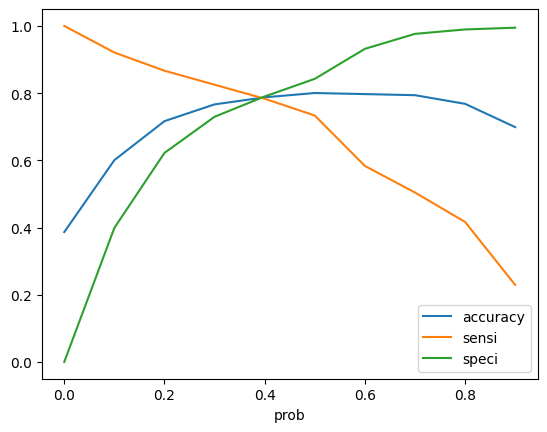

In [193]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.4 or slightly less is the optimum point to take it as a cutoff probability. We’ll consider 0.4 as the cutoff for ease of understanding.

In [194]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Survive_Prob.map( lambda x: 1 if x > 0.4 else 0)
Y_train_pred_final.head()

,Survived,Survive_Prob,PassengerId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
85,1.0,0.315573,86.0,0,1,1,1,1,0,0,0,0,0,0,0
791,0.0,0.105189,795.0,0,1,1,0,0,0,0,0,0,0,0,0
161,1.0,0.759648,162.0,1,1,1,1,1,1,1,1,1,0,0,1
758,0.0,0.052799,762.0,0,1,0,0,0,0,0,0,0,0,0,0
408,0.0,0.336248,410.0,0,1,1,1,1,0,0,0,0,0,0,0


In [195]:
print("Accuracy", metrics.accuracy_score(Y_train_pred_final.Survived, Y_train_pred_final.final_predicted))
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Survived, Y_train_pred_final.final_predicted)
print("Confusion Matrix", confusion2)
# Assigning values
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# The sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Accuracy 0.7874396135265701
Confusion Matrix [[301  80]
 [ 52 188]]
Sensitivity:  0.7833333333333333
Specificity:  0.7900262467191601


Let’s make predictions on the test data using our final model. First, we’ll scale the test data similar to the one we did on train data after splitting.

In [198]:
scaler = StandardScaler()
X_test[["Age","Fare"]] = scaler.fit_transform(X_test[["Age","Fare"]])
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
637,3.0,0.0,0.893315,0.0,5.0,0.290747
146,3.0,1.0,-0.201658,0.0,0.0,-0.540700
277,3.0,1.0,-1.765906,4.0,1.0,0.015372
483,1.0,1.0,-0.358083,1.0,0.0,1.630577
676,3.0,0.0,-0.905569,0.0,0.0,-0.487361


Let’s make predictions now on test data

In [200]:
X_test_sm = sm.add_constant(X_test)
Y_test_pred = res.predict(X_test_sm)

Y_pred_1 = pd.DataFrame(Y_test_pred)
Y_test_df = pd.DataFrame(Y_test)

Y_test_df['PassengerId'] = Y_test_df.index

Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

Y_pred_final = pd.concat([Y_test_df, Y_pred_1], axis = 1)

Y_pred_final.head()

,Survived,PassengerId,0
0,0.0,637,0.375646
1,1.0,146,0.096482
2,0.0,277,0.066865
3,1.0,483,0.537102
4,1.0,676,0.712244


In [202]:
#Renaming the column
Y_pred_final = Y_pred_final.rename(columns={0: "Survive_Prob"})
Y_pred_final = Y_pred_final.reindex(columns=["PassengerId", "Survived", "Survive_Prob"])
Y_pred_final.head()

,PassengerId,Survived,Survive_Prob
0,637,0.0,0.375646
1,146,1.0,0.096482
2,277,0.0,0.066865
3,483,1.0,0.537102
4,676,1.0,0.712244


Let’s predict the model using 0.4 as cutoff, which we got earlier on the train dataset.

In [203]:
Y_pred_final["final_predicted"] = Y_pred_final.Survive_Prob.map(lambda x:1 if x > 0.4 else 0)
Y_pred_final.head()

,PassengerId,Survived,Survive_Prob,final_predicted
0,637,0.0,0.375646,0
1,146,1.0,0.096482,0
2,277,0.0,0.066865,0
3,483,1.0,0.537102,1
4,676,1.0,0.712244,1


Let’s check the accuracy, sensitivity, and specificity values for the test data and compare it.

In [205]:
# Checking the overall accuracy.
print('Accuracy: ', metrics.accuracy_score(Y_pred_final.Survived, Y_pred_final.final_predicted))

# Checking the Confusion Matrix
confusion2 = metrics.confusion_matrix(Y_pred_final.Survived, Y_pred_final.final_predicted )
print(confusion2)

# Assigning the values from the matrix
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ', TN / float(TN+FP))

Accuracy:  0.8127340823970037
[[143  25]
 [ 25  74]]
Sensitivity:  0.7474747474747475
Specificity:  0.8511904761904762


In [206]:
Y_pred_final.head()

,PassengerId,Survived,Survive_Prob,final_predicted
0,637,0.0,0.375646,0
1,146,1.0,0.096482,0
2,277,0.0,0.066865,0
3,483,1.0,0.537102,1
4,676,1.0,0.712244,1


Let's calculate the ROC curve as well for the fun of it. Normally you wouldn't want to do this on a dataset with imbalanced classes like this one because it can show you an overly optimistic picture of your model. But just as an example let's do it anyways

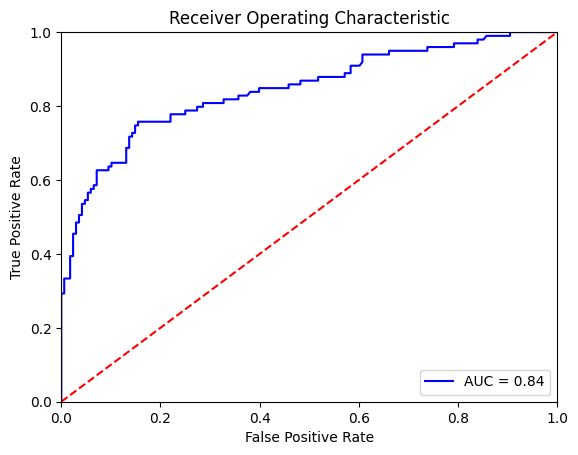

In [211]:
import sklearn.metrics as metrics

fpr, tpr, thershold = metrics.roc_curve(Y_test, Y_pred_final.Survive_Prob)
roc_auc = metrics.auc(fpr, tpr)

# ploting grph

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

If we compare the training dataset’s accuracy, sensitivity, and specificity values, there is not that much of a change. So the model we have built is good enough to predict any future titanic data.